# Machine Learning

# KNN

In [0]:
#@title KNN-11
#import Packages
import numpy as np
import pandas as pd
from sklearn import metrics
#Read Dataset
dataset=pd.read_csv("knntissuepaper.csv")
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,2].values

#import KNeighborsClassifier and create object of it
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=3)
classifier.fit(X,y)

#Use below two to get accuracy for k
y_pred=classifier.predict(X)
print("Accuracy for k: ",metrics.accuracy_score(y, y_pred))


#predict class for the points(3,7)
X_test=np.array([3,7])
print(X_test)
y_pred=classifier.predict([X_test])
print('General KNN:', y_pred) 

classifier=KNeighborsClassifier(n_neighbors=3, weights='distance')
classifier.fit(X,y)


Accuracy for k:  1.0
[3 7]
General KNN: ['Good']


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='distance')

In [0]:
#@title KNN-9
#import Packages
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt

#Read Dataset
dataset=pd.read_csv("knndata.csv")
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,2].values


#import KNeighborsClassifier and create object of it
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=4)
classifier.fit(X,y)
y_pred=classifier.predict(X)
print(metrics.accuracy_score(y, y_pred))

#predict class for the points(6,6)
X_test=np.array([6,6])
print(X_test)
y_pred=classifier.predict([X_test])
print('General KNN:', y_pred) 



0.6666666666666666
[6 6]
General KNN: ['negative']


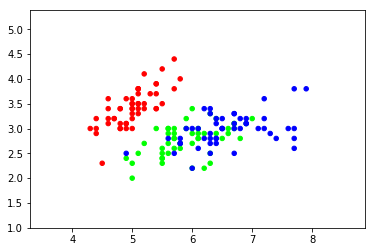

In [0]:
#@title Plot knn data points 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics 

n_neighbors = 5


iris = datasets.load_iris()
 

# we only take the first two features
X = iris.data[:, :2]
y = iris.target
# weights can be ['uniform', 'distance']
# we again create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()
    
#Uncomment following code to plot decision boundary based on knn(if asked)  
#     # Plot the decision boundary. For that, we will assign a color to each
#     # point in the mesh [x_min, x_max]x[y_min, y_max].
#     x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                          np.arange(y_min, y_max, h))
#     Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

#     # Put the result into a color plot
#     Z = Z.reshape(xx.shape)
#     plt.figure()
#     plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
#     plt.title("3-Class classification (k = %i, weights = '%s')"% (n_neighbors, weights))
#     plt.show()
    
    



# Decision Tree

In [0]:
#@title 8 Decision Tree
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df = pd.read_csv('buy_data.csv')
df = df.apply(LabelEncoder().fit_transform)

X, y = df.drop('Buys', axis=1), df['Buys']
train_x, test_x, train_y ,test_y = train_test_split(X, y, test_size=0.2, random_state=1)

classifier = DecisionTreeClassifier()
classifier.fit(train_x, train_y)
print(f'Score is: {classifier.score(test_x, test_y)*100:.2f}%')

from sklearn.tree import export_graphviz
export_graphviz(classifier, out_file='tree.dot')
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(classifier, out_file=dot_data, filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('prob10.png')


Score is: 66.67%


True

# Linear Regression

In [0]:
#@title 7
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston

X = load_boston()['data']

y = load_boston()['target']
# read a custom csv file by importing pandas and using pd.read_csv("txt.csv")
lr = LinearRegression()
cscores = cross_val_score(lr, X, y, cv=5)
lr.fit(X,y)
print('Cross Val Score for Linear Regression is ' + str(round(cscores.mean()*100, 2))+', Accuracy score is: '+str(round(lr.score(X,y)*100, 2)))



lrr = Ridge()
cscores = cross_val_score(lrr, X, y, cv=5)
lrr.fit(X,y)
print('Cross Val Score for Ridge Regression is ' + str(round(cscores.mean()*100, 2))+', Accuracy score is: '+str(round(lrr.score(X,y)*100, 2)))

lrl = Lasso()
cscores = cross_val_score(lrl, X, y, cv=5)
lrl.fit(X,y)
print('Cross Val Score for Lasso Regression is ' + str(round(cscores.mean()*100, 2))+', Accuracy score is: '+str(round(lrl.score(X,y)*100, 2)))


Cross Val Score for Linear Regression is 35.33, Accuracy score is: 74.06
Cross Val Score for Ridge Regression is 38.92, Accuracy score is: 73.89
Cross Val Score for Lasso Regression is 43.18, Accuracy score is: 68.26


In [0]:
#@title 6
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

X = load_boston()['data']

y = load_boston()['target']

lr = LinearRegression()
lr.fit(X, y)
cscores = cross_val_score(lr, X, y, cv=5)
print('Cross Val Score for Linear Regression is ' + str(round(cscores.mean()*100, 2))+', Accuracy score is: '+str(round(lr.score(X,y)*100, 2)))

equation = []
for i, coef in enumerate(lr.coef_):
    equation.append('(' + str(round(coef, 2)) + ')*x' + str(i+1))

print('Line equation is ' + ' + '.join(equation) + ' + (' + str(round(lr.intercept_, 2)) + ')')


Cross Val Score for Linear Regression is 35.33, Accuracy score is: 74.06
Line equation is (-0.11)*x1 + (0.05)*x2 + (0.02)*x3 + (2.69)*x4 + (-17.77)*x5 + (3.81)*x6 + (0.0)*x7 + (-1.48)*x8 + (0.31)*x9 + (-0.01)*x10 + (-0.95)*x11 + (0.01)*x12 + (-0.52)*x13 + (36.46)


 Accuracy score is: 43.71


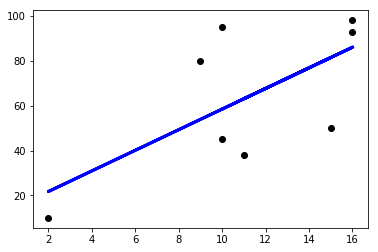

Line equation is 4.59*x + (12.58)


In [0]:
#@title 5-LR
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Creating the points in numpy
X = np.array([
    [10],
    [9],
    [2],
    [15],
    [10],
    [16],
    [11],
    [16]
])

y = np.array([
    [95],
    [80],
    [10],
    [50],
    [45],
    [98],
    [38],
    [93]
])

lr = LinearRegression()
lr.fit(X, y)

print(' Accuracy score is: '+str(round(lr.score(X,y)*100, 2)))

plt.scatter(X, y, color='black')
plt.plot(X, lr.predict(X), color='blue', linewidth=3)
plt.show()

print('Line equation is ' + str(round(lr.coef_[0][0], 2)) + '*x + (' + str(round(lr.intercept_[0], 2)) + ')')


# KMeans

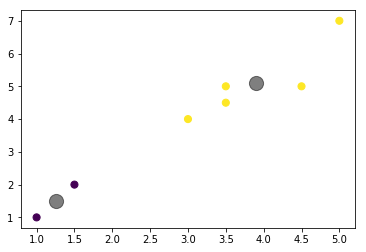

Refer graph for best K for this dataset


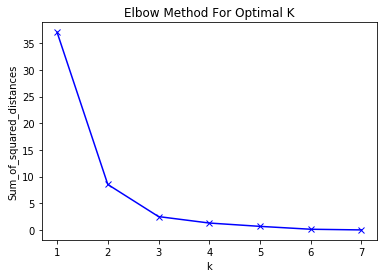

In [0]:
#@title 4
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Creating the points in numpy
X = np.array([
    [1.0, 1.0],
    [1.5, 2.0],
    [3.0, 4.0],
    [5.0, 7.0],
    [3.5, 5.0],
    [4.5, 5.0],
    [3.5, 4.5]
])
#for random centroids use KMeans(n_clusters= k,init='random')
kmeans = KMeans(n_clusters=2, init=np.array([[0.1, 0.6], [0.3, 0.2]]), n_init=1)
kmeans.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

print('Refer graph for best K for this dataset')

sum_of_squared_distances = []
for k in range(1, 8):
    km = KMeans(n_clusters=k)
    km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(range(1, 8), sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal K')
plt.show()


Refer graph for best K for this dataset


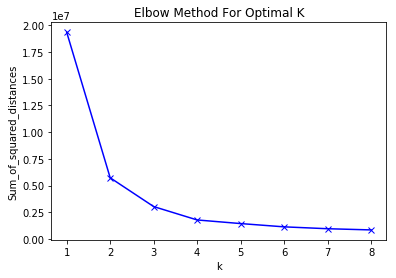

Enter the optimal K selected from graph: 3


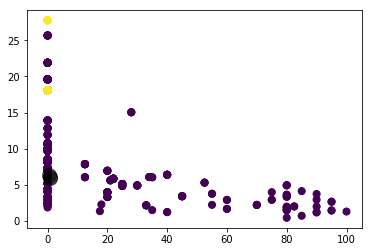

In [0]:
#@title 3
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

X = load_boston()['data']

print('Refer graph for best K for this dataset')

sum_of_squared_distances = []
for k in range(1, 9):
    km = KMeans(n_clusters=k)#for random centroids use KMeans(n_clusters= k,init='random')
    km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(range(1, 9), sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal K')
plt.show()

k = int(input('Enter the optimal K selected from graph: '))

km = KMeans(n_clusters=k,init = 'random' ,max_iter=500)
km.fit(X)

plt.scatter(X[:, 1], X[:, 2], c=km.labels_, s=50, cmap='viridis')

centers = km.cluster_centers_
plt.scatter(centers[:, 4], centers[:, 5], c='black', s=200, alpha=0.5)


Refer graph for best K for this dataset


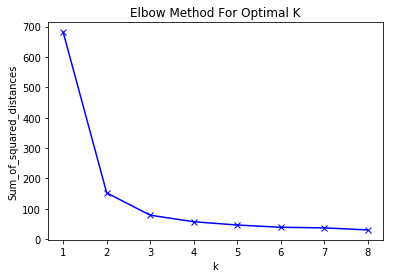

Enter the optimal K selected from graph: 3


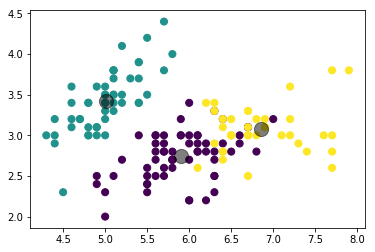

In [0]:
#@title 2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

X = load_iris()['data']
#print(X)
print('Refer graph for best K for this dataset')

sum_of_squared_distances = []
for k in range(1, 9):
    km = KMeans(n_clusters=k,init='random')
    km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(range(1, 9), sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal K')
plt.show()

k = int(input('Enter the optimal K selected from graph: '))

km = KMeans(n_clusters=k,init='random' ,max_iter=500)
km.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=km.labels_, s=50, cmap='viridis')

centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)


P6 belongs to cluster number 0
M2 has 3 points in its cluster
M1 is (0.14800000000000002, 0.712)
M2 is (0.24666666666666667, 0.19999999999999996)
Refer graph for best K for this dataset


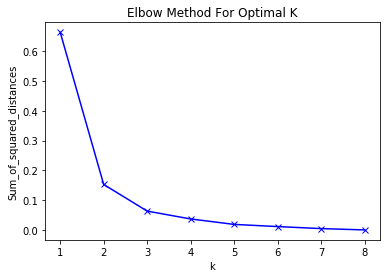

In [0]:
#@title 1
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Creating the points in numpy
X = np.array([
    [0.1, 0.6],
    [0.15, 0.71],
    [0.08, 0.9],
    [0.16, 0.85],
    [0.2, 0.3],
    [0.25, 0.5],
    [0.24, 0.1],
    [0.3, 0.2]
])
#for random centroids use KMeans(n_clusters= k,init='random')
kmeans = KMeans(n_clusters=2, init=np.array([[0.1, 0.6], [0.3, 0.2]]), n_init=1)
kmeans.fit(X)

print('P6 belongs to cluster number ' + str(kmeans.labels_[5]))
labels = list(kmeans.labels_)
print('M2 has ' + str(labels.count(1)) + ' points in its cluster')
print('M1 is (' + str(kmeans.cluster_centers_[0][0]) + ', ' + str(kmeans.cluster_centers_[0][1]) + ')')
print('M2 is (' + str(kmeans.cluster_centers_[1][0]) + ', ' + str(kmeans.cluster_centers_[1][1]) + ')')


print('Refer graph for best K for this dataset')

sum_of_squared_distances = []
for k in range(1, 9):
    km = KMeans(n_clusters=k)
    km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(range(1, 9), sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal K')
plt.show()


# Information & Cyber Security

In [0]:
#@title DiffieHellman
def isprimitiveroot(q,a):
	return sorted([(a**i)%q for i in range(1,q)]) == list(range(1,q))

q = int(input("Enter a prime no: ") )
while True : 
	a = int( input("Enter its primitive root : ") ) 
	if isprimitiveroot(q,a) :
		break
	print(a,"is not primitive root of",q)
	print("Please Enter again") 

xA =  int(input("Enter private key of A:") )
yA =  (a**xA) % q 

xB =  int(input("Enter private key of B:") )
yB =  (a**xB) % q 

#Calculation of Secret Key by user A
kA =  (yB**xA) % q 

#Calculation of Secret Key by user B
kB =  (yA**xB) % q 

print("Public key of A:",yA)
print("Private key of B:",yB)

print("Key calculated at A side:",kA)
print("Key calculated at B side:",kB)

'''
Sample Input: 

Enter a prime no: 353
Enter its primitive root : 3
Enter private key of A:97
Enter private key of B:233
Public key of A: 40
Private key of B: 248
Key calculated at A side: 160
Key calculated at B side: 160
'''


Enter a prime no: 353
Enter its primitive root : 3
Enter private key of A:97
Enter private key of B:233
Public key of A: 40
Private key of B: 248
Key calculated at A side: 160
Key calculated at B side: 160


'\nSample Input: \n\nEnter a prime no: 353\nEnter its primitive root : 3\nEnter private key of A:97\nEnter private key of B:233\nPublic key of A: 40\nPrivate key of B: 248\nKey calculated at A side: 160\nKey calculated at B side: 160\n'

In [0]:
#@title RSA
from math import *
def gcd(a,b):
	if b==0:
		return a
	return gcd(b,a%b)
	
def modularInverse(e,phiN):
	k = 1 
	while (phiN*k + 1)%e !=0 : 
		k+=1 
	return (phiN*k+1)//e 

p = int(input("Enter prime no 1:"))
q = int(input("Enter prime no 2:"))
n = p * q 
phiN = (p-1) * (q-1)

for num in range(2,phiN):
	if gcd(num,phiN) == 1: 
		e = num
		break
print("Public key for encryption",e)
d = modularInverse(e,phiN)
print("Public key for decryption",d)
m = int(input("Enter message:"))
c = m**e%n
print("Cipher after encryption:" , c) 

dm = c**d%n
print("Orig message after decrytpion:",dm)




Enter prime no 1:3
Enter prime no 2:7
Public key for encryption 5
Public key for decryption 5
Enter message:13
Cipher after encryption: 13
Orig message after decrytpion: 13


In [0]:
#@title PlayFair
key = input("Enter the key without spaces:") + ''.join([chr(ch+ord('a')) for ch in range(26) ])
key = key.replace('j','i')
used = ""
pm = []
for ch in key:
	if ch not in used:
		pm.append(ch)
		used+=ch
pm = [ pm[i:i+5] for i in range(0,25,5) ] 
print("\nPlayFair Matrix:")
print(*pm,sep='\n')

def encrypt(s):
	pos = [[i,j] for i in range(5) for j in range(5) if s[0] in pm[i][j] ] 
	x1,y1 = pos[0][0],pos[0][1]
	pos = [[i,j] for i in range(5) for j in range(5) if s[1] in pm[i][j]  ] 
	x2,y2 = pos[0][0],pos[0][1]
	if x1 == x2 : 
		return pm[x1][(y1+1)%5]+pm[x2][(y2+1)%5]
	if y1 == y2 : 
		return pm[(x1+1)%5][y1]+pm[(x2+1)%5][y2]
	return pm[x1][y2] + pm[x2][y1]

pt = input("\nEnter the plaintext:")
pt = pt.replace('j','i')
for ch in ", ;.":
	pt = pt.replace(ch,'')
l = len(pt)
i=0
while i < (l-1) : 
	if pt[i] == pt[i+1] : 
		pt = pt[:i+1] + 'x' + pt[i+1:]
		l+=1
	i+=2
if l%2:
	pt+='x'
	l+=1
paired_pt = " ".join([pt[i:i+2] for i in range(0,l,2) ])
print("\nPlaintext in paired form:",paired_pt)
cipher = ""

for i in range(0,l,2):
	cipher+=encrypt(pt[i]+pt[i+1])

print("\nEncrypted text:",cipher)

'''
Sample Input:

Enter the key without spaces:another

PlayFair Matrix:
['a', 'n', 'o', 't', 'h']
['e', 'r', 'b', 'c', 'd']
['f', 'g', 'i', 'k', 'l']
['m', 'p', 'q', 's', 'u']
['v', 'w', 'x', 'y', 'z']

Enter the plaintext:we live in a world full of beauty

Plaintext in paired form: we li ve in aw or ld fu lx lo fb ea ut yx

Encrypted text: vrfkafgonvnbullmizihiefeshzy
'''




Enter the key without spaces:another

PlayFair Matrix:
['a', 'n', 'o', 't', 'h']
['e', 'r', 'b', 'c', 'd']
['f', 'g', 'i', 'k', 'l']
['m', 'p', 'q', 's', 'u']
['v', 'w', 'x', 'y', 'z']

Enter the plaintext:we live in a world full of beauty

Plaintext in paired form: we li ve in aw or ld fu lx lo fb ea ut yx

Encrypted text: vrfkafgonvnbullmizihiefeshzy


"\nSample Input:\n\nEnter the key without spaces:another\n\nPlayFair Matrix:\n['a', 'n', 'o', 't', 'h']\n['e', 'r', 'b', 'c', 'd']\n['f', 'g', 'i', 'k', 'l']\n['m', 'p', 'q', 's', 'u']\n['v', 'w', 'x', 'y', 'z']\n\nEnter the plaintext:we live in a world full of beauty\n\nPlaintext in paired form: we li ve in aw or ld fu lx lo fb ea ut yx\n\nEncrypted text: vrfkafgonvnbullmizihiefeshzy\n"

In [0]:
#@title SDES
plainText =  "01110010"
key =  "1010000010"
pc1 = [3,5,2,7,4,10,1,9,8,6]   
pc2 = [6,3,7,4,8,5,10,9] 
k1  = ""
k2  = ""
ip  = [2,6,3,1,4,8,5,7]
et  = [4,1,2,3,2,3,4,1]
inverseip = [4,1,3,5,7,2,8,6]
ptable = [2,4,3,1]
sbox0 = [
			[ "01", "00", "11", "10" ],
			[ "11", "10", "01", "00" ],
			[ "00", "10", "01", "11" ],
			[ "11", "01", "11", "10" ]
		]
sbox1 = [
			[ "00", "01", "10", "11" ],
			[ "10", "00", "01", "11" ],
			[ "11", "00", "01", "00" ],
			[ "10", "00", "00", "11" ]
		]

def apply_transpose(message,table):
	return ''.join([ message[ table[i]-1 ] for i in range(len(table)) ])
	
def xor(l,r):
	return ''.join(['1' if l[i]!=r[i] else '0' for i in range(len(l))])

def lcr(m,times):  
	for time in range(times):
		m = m[1:] + m[:1]
	return m 
	
def gen_subkeys():
	global key,k1,k2
	print("orig key",key)
	key = apply_transpose(key,pc1)
#	print("k+ ",key)
	c0,d0 = key[0:5],key[5:]	
#	print("c0 d0",c0,d0)
	c1,d1 = lcr(c0,1),lcr(d0,1)
	k1    = apply_transpose(c1+d1,pc2)
	c2,d2 = lcr(c1,2),lcr(d1,2)
	k2 	  = apply_transpose(c2+d2,pc2)	

def apply_sbox(m,sbox):
	rowIndex =  int(m[0]+m[-1],2)
	colIndex =  int(m[1]+m[2],2)
	return sbox[rowIndex][colIndex]
	
def f(r,k):
	er = apply_transpose(r,et)
#	print("expanded r1",er)
	b0,b1 = xor(er,k)[0:4] , xor(er,k)[4:] 	
#	print("b0 b1",b0,b1)
	result = apply_sbox(b0,sbox0) + apply_sbox(b1,sbox1)
	return apply_transpose(result,ptable)
	
def algo(): 
	permuted_text = apply_transpose(plainText,ip) 
#	print(permuted_text)
	gen_subkeys()
	print("Subekys:",k1,k2)
	l0,r0 = permuted_text[:4],permuted_text[4:] 
	#print("l0 r0",l0,r0)
	l1,r1 = r0, xor(l0, f(r0,k1) ) 
	#print("l1 r1",l1,r1)
	l2,r2 = r1, xor(l1, f(r1,k2) )
	l2,r2 = r2,l2 
	cipher = apply_transpose(l2+r2,inverseip)
	print("cipher",cipher)
algo()



orig key 1010000010
Subekys: 10100100 01000011
cipher 01110111


In [0]:
#@title implementation of S-AES 

sbox = { 
		 "0000" : "1001" , "0001" : "0100" , "0010" : "1010" , "0011" : "1011" ,
		 "0100" : "1101" , "0101" : "0001" , "0110" : "1000" , "0111" : "0101" ,	
		 "1000" : "0110" , "1001" : "0010" , "1010" : "0000" , "1011" : "0011" ,		 
		 "1100" : "1100" , "1101" : "1110" , "1110" : "1111" , "1111" : "0111" 
	   }

key0 = "0100101011110101"
key1 = ""
key2 = ""
pt   = "1101011100101000"
roundConstant = ["","10000000","00110000"]

def applysbox(b):
	return sbox[b]

def xor(l,r):
	return ''.join(['1' if l[i]!=r[i] else '0' for i in range(len(l))])

def g(w,rnd):
	w = w[4:] + w[:4]					    #circular shift
	w = applysbox(w[:4]) + applysbox(w[4:]) #byte substitution
	w = xor(w,roundConstant[rnd])
	return w 

def gen_keys():
	global key0,key1,key2
	w0,w1 = key0[:8] , key0[8:]
	w2 = xor(w0,g(w1,1))	
	w3 = xor(w2,w1)
	key1 = w2+w3 
	print("key1 ",key1)
	
	w4 = xor(w2,g(w3,2))
	w5 = xor(w4,w3)
	key2 = w4+w5
	print("key2 ",key2)

def cross(b1,b2):
	#4th row of GF24 lookup table
	lt = ["0000","0100","1000","1100","0011","0111","1011","1111","0110","0010","1110","1010","0101","0001","1101","1001"] 
	if b2 == 1:
		return b1 
	if b2 == 4:
		return lt[int(b1,2)]

def mixcol(it, gf):
	return [ [ xor(cross(it[0][i],gf[j][0]),cross(it[1][i],gf[j][1])) for i in range(2) ] for j in range(2) ] 

def bytesubstitution(b):
	return ''.join( [applysbox(b[i:i+4]) for i in range(0,16,4) ] ) 

def algo():
	it = xor(pt,key0) # Initial Transformation
	
	#Round1 
	it = bytesubstitution(it)
	itMat = [ 
			  [it[:4], it[8:12] ],
			  [it[4:8], it[12:] ]
			]
	
	#RowShift
	itMat[0] = itMat[0]			#Row1 unchanged 
	itMat[1] = [itMat[1][1],itMat[1][0]]   #Row2 byte shifted by 1
	
	#MixColumn
	gfMat = [
				[1,4],
				[4,1]  
			] 
	#print(itMat)		
	mixedCol = mixcol(itMat, gfMat) 
	#print(mixedCol)
	
	round1op = xor(mixedCol[0][0]+mixedCol[1][0]+mixedCol[0][1]+mixedCol[1][1],key1)
	
	#round2 begins
	
	round1op = bytesubstitution(round1op)
	round1Mat = [ 
			  [round1op[:4], round1op[8:12] ],
			  [round1op[4:8], round1op[12:] ]
			]
	
	#RowShift
	round1Mat[0] = round1Mat[0]			#Row1 unchanged 
	round1Mat[1] = [round1Mat[1][1],round1Mat[1][0]]   #Row2 byte shifted by 1
	
	cipherText = xor(round1Mat[0][0]+round1Mat[1][0]+round1Mat[0][1]+round1Mat[1][1],key2)
	print("cipher text",cipherText)		
gen_keys()			
algo()		
			
			


key1  1101110100101000
key2  1000011110101111
cipher text 0010010011101100
